MUHAMAD NURDIN
1301204025
IF 44 08

In [80]:
#import library
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('https://github.com/Nrdn062/CaseBased2-ML/blob/d66155282e7e5405fcc7ecc0deafed2d3c9dcb8c/water-treatment.data?raw=true',header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,D-26/8/91,32723,0.16,7.7,93,252,176,56.8,2.3,894,...,942,?,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535,0.32,7.8,192,346,172,68.6,4.0,988,...,950,?,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,D-28/8/91,32922,0.30,7.4,139,367,180,64.4,3.0,1060,...,1136,?,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,D-29/8/91,32190,0.30,7.3,200,545,258,65.1,4.0,1260,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [6]:
df

,1,2,3,4,5,6,7,8,9,10,...,29,30,31,32,33,34,35,36,37,38
0,44101,1.50,7.8,?,407,166,66.3,4.5,2110,7.9,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,39024,3.00,7.7,?,443,214,69.2,6.5,2660,7.7,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,32229,5.00,7.6,?,528,186,69.9,3.4,1666,7.7,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.9,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,32723,0.16,7.7,93,252,176,56.8,2.3,894,7.7,...,942,?,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,33535,0.32,7.8,192,346,172,68.6,4.0,988,7.8,...,950,?,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,32922,0.30,7.4,139,367,180,64.4,3.0,1060,7.5,...,1136,?,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,32190,0.30,7.3,200,545,258,65.1,4.0,1260,7.4,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [7]:
columnName = ["Q-E","ZN-E","PH-E","DBO-E","DQO-E","SS-E","SSV-E","SED-E","COND-E","PH-P","DBO-P","SS-P","SSV-P","SED-P","COND-P","PH-D","DBO-D","DQO-D","SS-D","SSV-D","SED-D","COND-D","PH-S","DBO-S","DQO-S","SS-S","SSV-S","SED-S","COND-S","RD-DBO-P","RD-SS-P","RD-SED-P","RD-DBO-S","RD-DQO-S","RD-DBO-G","RD-DQO-G","RD-SS-G","RD-SED-G"]

In [8]:
print(columnName)

['Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E', 'COND-E', 'PH-P', 'DBO-P', 'SS-P', 'SSV-P', 'SED-P', 'COND-P', 'PH-D', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'COND-D', 'PH-S', 'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P', 'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G', 'RD-SS-G', 'RD-SED-G']


In [9]:
df.shape

(527, 38)

In [10]:
df.columns = columnName

In [11]:
df

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,44101,1.50,7.8,?,407,166,66.3,4.5,2110,7.9,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,39024,3.00,7.7,?,443,214,69.2,6.5,2660,7.7,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,32229,5.00,7.6,?,528,186,69.9,3.4,1666,7.7,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.9,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,32723,0.16,7.7,93,252,176,56.8,2.3,894,7.7,...,942,?,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,33535,0.32,7.8,192,346,172,68.6,4.0,988,7.8,...,950,?,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,32922,0.30,7.4,139,367,180,64.4,3.0,1060,7.5,...,1136,?,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,32190,0.30,7.3,200,545,258,65.1,4.0,1260,7.4,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [12]:
df.columns[df.isin(["?"]).any()]

Index(['Q-E', 'ZN-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E', 'DBO-P',
       'SSV-P', 'SED-P', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D', 'SED-D', 'PH-S',
       'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P',
       'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G',
       'RD-SS-G', 'RD-SED-G'],
      dtype='object')

In [13]:
df = df.replace('?',np.nan)

In [14]:
df.columns[df.isin(["?"]).any()]

Index([], dtype='object')

In [15]:
null = []
for i in df:
  value = []
  if df[i].isna().sum() > 0:
    value = [i,df[i].isna().sum()]
    null.append(value)

In [16]:
df

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,44101,1.50,7.8,NaN,407,166,66.3,4.5,2110,7.9,...,2000,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,39024,3.00,7.7,NaN,443,214,69.2,6.5,2660,7.7,...,2590,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100
2,32229,5.00,7.6,NaN,528,186,69.9,3.4,1666,7.7,...,1888,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.9,...,2120,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,32723,0.16,7.7,93,252,176,56.8,2.3,894,7.7,...,942,NaN,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,33535,0.32,7.8,192,346,172,68.6,4.0,988,7.8,...,950,NaN,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100
524,32922,0.30,7.4,139,367,180,64.4,3.0,1060,7.5,...,1136,NaN,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99
525,32190,0.30,7.3,200,545,258,65.1,4.0,1260,7.4,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87.0,89.5,99.8


In [17]:
print(null)

[['Q-E', 18], ['ZN-E', 3], ['DBO-E', 23], ['DQO-E', 6], ['SS-E', 1], ['SSV-E', 11], ['SED-E', 25], ['DBO-P', 40], ['SSV-P', 11], ['SED-P', 24], ['DBO-D', 28], ['DQO-D', 9], ['SS-D', 2], ['SSV-D', 13], ['SED-D', 25], ['PH-S', 1], ['DBO-S', 23], ['DQO-S', 18], ['SS-S', 5], ['SSV-S', 17], ['SED-S', 28], ['COND-S', 1], ['RD-DBO-P', 62], ['RD-SS-P', 4], ['RD-SED-P', 27], ['RD-DBO-S', 40], ['RD-DQO-S', 26], ['RD-DBO-G', 36], ['RD-DQO-G', 25], ['RD-SS-G', 8], ['RD-SED-G', 31]]


In [18]:
imputer = SimpleImputer(strategy = 'mean', missing_values = np.nan)
imputer.fit([df['Q-E'],df['ZN-E'],df['DBO-E'],df['DQO-E'],df['SS-E'],df['SSV-E'],df['SED-E'],df['DBO-P'],df['SSV-P'],df['SED-P'],df['DBO-D'],df['DQO-D'],df['SS-D'],df['SSV-D'],df['SED-D'],df['PH-S'],df['DBO-S'],df['DQO-S'],df['SS-S'],df['SSV-S'],
             df['SED-S'],df['COND-S'],df['RD-DBO-P'],df['RD-SS-P'],df['RD-SED-P'],df['RD-DBO-S'],df['RD-DQO-S'],df['RD-DBO-G'],df['RD-DQO-G'],df['RD-SS-G'],df['RD-SED-G']])
df['Q-E'],df['ZN-E'],df['DBO-E'],df['DQO-E'],df['SS-E'],df['SSV-E'],df['SED-E'],df['DBO-P'],df['SSV-P'],df['SED-P'],df['DBO-D'],df['DQO-D'],df['SS-D'],df['SSV-D'],df['SED-D'],df['PH-S'],df['DBO-S'],df['DQO-S'],df['SS-S'],df['SSV-S'],df['SED-S'],df['COND-S'],df['RD-DBO-P'],df['RD-SS-P'],df['RD-SED-P'],df['RD-DBO-S'],df['RD-DQO-S'],df['RD-DBO-G'],df['RD-DQO-G'],df['RD-SS-G'],df['RD-SED-G'] = imputer.transform([df['Q-E'],df['ZN-E'],df['DBO-E'],df['DQO-E'],df['SS-E'],df['SSV-E'],df['SED-E'],df['DBO-P'],df['SSV-P'],df['SED-P'],df['DBO-D'],df['DQO-D'],df['SS-D'],df['SSV-D'],df['SED-D'],df['PH-S'],df['DBO-S'],df['DQO-S'],df['SS-S'],df['SSV-S'],
             df['SED-S'],df['COND-S'],df['RD-DBO-P'],df['RD-SS-P'],df['RD-SED-P'],df['RD-DBO-S'],df['RD-DQO-S'],df['RD-DBO-G'],df['RD-DQO-G'],df['RD-SS-G'],df['RD-SED-G']])


In [19]:
df

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,44101.0,1.50,7.8,1998.021667,407.0,166.0,66.3,4.500000,2110,7.9,...,2000.0,1998.021667,58.8,95.500000,1998.021667,70.0,1998.021667,79.4,87.3,99.600000
1,39024.0,3.00,7.7,1824.995833,443.0,214.0,69.2,6.500000,2660,7.7,...,2590.0,1824.995833,60.7,94.800000,1824.995833,80.8,1824.995833,79.5,92.1,100.000000
2,32229.0,5.00,7.6,1505.681250,528.0,186.0,69.9,3.400000,1666,7.7,...,1888.0,1505.681250,58.2,95.600000,1505.681250,52.9,1505.681250,75.8,88.7,98.500000
3,35023.0,3.50,7.9,205.000000,588.0,192.0,65.6,4.500000,2430,7.8,...,1840.0,33.100000,64.2,95.300000,87.300000,72.3,90.200000,82.3,89.6,100.000000
4,36924.0,1.50,8.0,242.000000,496.0,176.0,64.8,4.000000,2110,7.9,...,2120.0,1534.367407,62.7,95.600000,1534.367407,71.0,92.100000,78.2,87.5,99.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,32723.0,0.16,7.7,93.000000,252.0,176.0,56.8,2.300000,894,7.7,...,942.0,1189.502333,62.3,93.300000,69.800000,75.9,79.600000,78.6,96.6,99.600000
523,33535.0,0.32,7.8,192.000000,346.0,172.0,68.6,4.000000,988,7.8,...,950.0,1229.787333,58.3,97.800000,83.000000,59.1,91.100000,74.6,90.7,100.000000
524,32922.0,0.30,7.4,139.000000,367.0,180.0,64.4,3.000000,1060,7.5,...,1136.0,1214.147333,65.0,97.100000,76.200000,66.4,82.000000,77.1,88.9,99.000000
525,32190.0,0.30,7.3,200.000000,545.0,258.0,65.1,4.000000,1260,7.4,...,1326.0,39.800000,65.9,97.100000,81.700000,70.9,89.500000,87.0,89.5,99.800000


In [20]:
null = []
for i in df:
  value = []
  if df[i].isna().sum() > 0:
    value = [i,df[i].isna().sum()]
    null.append(value)

In [21]:
print(null)

[]


#**Data Preprocesing**


In [62]:
col1len = []
for col in df:
    if (len(df[col].unique()) == 1):
      col1len.append(col)
print(col1len)

[]


MinMax

In [35]:
def minMax(df) :
    return (df.iloc[:,:-1] - df.iloc[:,:-1].min()) / (df.iloc[:,:-1].max() - df.iloc[:,:-1].min())
df_normalized = minMax(df)

In [26]:
df_normalized

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,SED-S,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G
0,0.733500,0.000830,0.500000,0.642709,0.175648,0.035602,0.028446,0.001984,0.565723,0.500000,...,0.000006,0.403122,0.646223,0.030543,0.042627,0.645351,0.022200,0.644035,0.019594,0.024990
1,0.648830,0.001719,0.444444,0.586174,0.195045,0.060733,0.029999,0.002951,0.778984,0.333333,...,0.000000,0.583716,0.590244,0.031627,0.042287,0.589234,0.025695,0.587710,0.019627,0.026548
2,0.535510,0.002904,0.388889,0.481841,0.240842,0.046073,0.030374,0.001451,0.393563,0.333333,...,0.000016,0.368840,0.486937,0.030200,0.042676,0.485672,0.016666,0.483764,0.018423,0.025445
3,0.582105,0.002015,0.555556,0.056853,0.273170,0.049215,0.028071,0.001984,0.689802,0.416667,...,0.000000,0.354148,0.010515,0.033625,0.042530,0.025654,0.022944,0.022982,0.020538,0.025737
4,0.613809,0.000830,0.611111,0.068943,0.223601,0.040838,0.027642,0.001742,0.565723,0.500000,...,0.000006,0.439853,0.496218,0.032769,0.042676,0.494976,0.022523,0.023601,0.019204,0.025055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0.543748,0.000036,0.444444,0.020258,0.092134,0.040838,0.023357,0.000919,0.094223,0.333333,...,0.000003,0.079278,0.384644,0.032541,0.041559,0.019978,0.024109,0.019532,0.019334,0.028008
523,0.557290,0.000130,0.500000,0.052606,0.142781,0.038743,0.029678,0.001742,0.130671,0.416667,...,0.000000,0.081726,0.397677,0.030257,0.043744,0.024260,0.018672,0.023275,0.018032,0.026094
524,0.547067,0.000119,0.277778,0.035288,0.154096,0.042932,0.027428,0.001258,0.158589,0.166667,...,0.000006,0.138659,0.392617,0.034082,0.043404,0.022054,0.021035,0.020313,0.018846,0.025509
525,0.534859,0.000119,0.222222,0.055219,0.250002,0.083770,0.027803,0.001742,0.236138,0.083333,...,0.000003,0.196817,0.012682,0.034596,0.043404,0.023838,0.022491,0.022755,0.022068,0.025704


In [27]:
def hitungOutliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

for i in df.columns:
  outliers = hitungOutliers(df[i])
  percentage = len(outliers)/len(df[i])*100
  print(i)
  print("number of outliers: " + str(len(outliers)))
  print("max outlier value: " + str(outliers.max()))
  print("min outlier value: " + str(outliers.min()))
  print("Outliers percentage: "+ str(float(f'{percentage:.2f}'))+"%")
  print()

Q-E
number of outliers: 29
max outlier value: 60081.0
min outlier value: 118.507
Outliers percentage: 5.5%

ZN-E
number of outliers: 36
max outlier value: 1687.5733333333335
min outlier value: 6.2
Outliers percentage: 6.83%

PH-E
number of outliers: 2
max outlier value: 8.7
min outlier value: 6.9
Outliers percentage: 0.38%

DBO-E
number of outliers: 31
max outlier value: 3091.515625
min outlier value: 354.0
Outliers percentage: 5.88%

DQO-E
number of outliers: 15
max outlier value: 1936.9857142857145
min outlier value: 81.0
Outliers percentage: 2.85%

SS-E
number of outliers: 40
max outlier value: 2008.0
min outlier value: 352.0
Outliers percentage: 7.59%

SSV-E
number of outliers: 34
max outlier value: 1879.9142857142856
min outlier value: 13.2
Outliers percentage: 6.45%

SED-E
number of outliers: 36
max outlier value: 2067.4199999999996
min outlier value: 9.0
Outliers percentage: 6.83%

COND-E
number of outliers: 15
max outlier value: 3230
min outlier value: 2390
Outliers percentage:

In [28]:
df.corr()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
Q-E,1.000000,0.045682,0.220405,0.089545,-0.141314,0.005871,0.043775,0.003633,-0.080673,0.224579,...,-0.086093,0.068468,-0.022430,-0.007957,0.076956,0.025919,0.069226,0.038955,0.001602,0.006877
ZN-E,0.045682,1.000000,0.007024,-0.007112,-0.024545,0.000810,-0.011753,-0.015086,0.041907,-0.022295,...,0.043072,-0.029658,-0.012190,-0.017160,-0.022529,-0.016940,-0.019150,-0.016776,-0.009767,-0.015147
PH-E,0.220405,0.007024,1.000000,0.069036,0.144169,-0.078293,-0.014144,-0.067616,0.272851,0.902909,...,0.238348,0.071311,-0.039945,-0.057707,0.029745,0.040533,0.020223,0.038091,-0.008157,-0.040202
DBO-E,0.089545,-0.007112,0.069036,1.000000,0.152079,-0.022891,-0.047865,0.014541,0.105885,0.071815,...,0.104193,0.615144,-0.024470,0.011688,0.626740,0.116172,0.837936,0.155967,0.200510,0.133103
DQO-E,-0.141314,-0.024545,0.144169,0.152079,1.000000,0.176722,-0.082693,0.115998,0.220263,0.131673,...,0.198934,0.051237,-0.008930,0.108544,-0.037873,0.179177,0.059564,0.346247,-0.006045,0.096226
SS-E,0.005871,0.000810,-0.078293,-0.022891,0.176722,1.000000,-0.021438,0.066626,0.067273,-0.109997,...,0.057289,-0.053887,0.199099,0.058738,-0.068700,0.041773,-0.055164,0.011831,0.096305,0.047465
SSV-E,0.043775,-0.011753,-0.014144,-0.047865,-0.082693,-0.021438,1.000000,0.049947,0.054660,-0.024227,...,0.050800,0.005681,-0.000416,0.048956,0.006064,0.047483,0.013111,0.044386,-0.014757,0.038268
SED-E,0.003633,-0.015086,-0.067616,0.014541,0.115998,0.066626,0.049947,1.000000,-0.030173,-0.127198,...,0.002206,0.006966,-0.014424,0.968349,0.042527,-0.049694,0.075539,0.011662,-0.025118,0.859983
COND-E,-0.080673,0.041907,0.272851,0.105885,0.220263,0.067273,0.054660,-0.030173,1.000000,0.244974,...,0.905853,0.055896,-0.025670,-0.027275,0.037887,0.028749,0.075094,0.028501,0.014180,-0.012287
PH-P,0.224579,-0.022295,0.902909,0.071815,0.131673,-0.109997,-0.024227,-0.127198,0.244974,1.000000,...,0.212468,0.028094,-0.023509,-0.120130,0.017117,0.028496,0.015478,0.033816,0.007916,-0.098661


#**EDA**

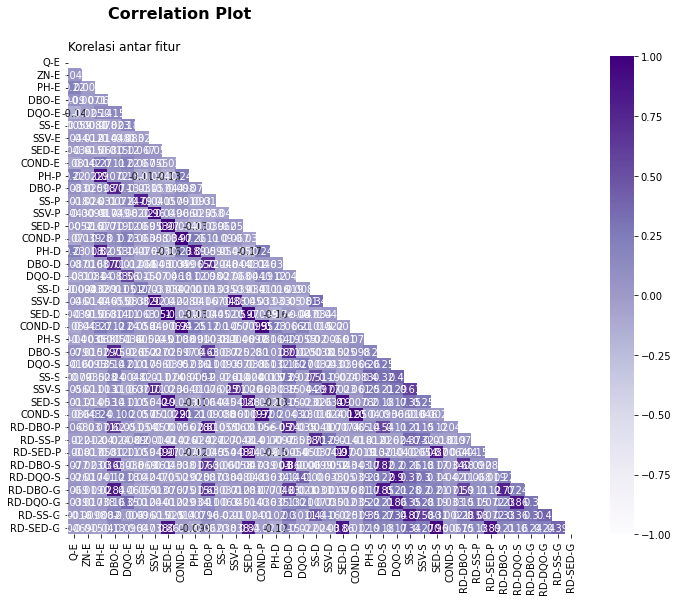

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='Purples')

plt.suptitle("Correlation Plot", ha='left', x=0.155, y=1.04, fontsize=16, fontweight='bold')
plt.title("Korelasi antar fitur", loc='left', fontsize=12) 
plt.tight_layout()
plt.show()

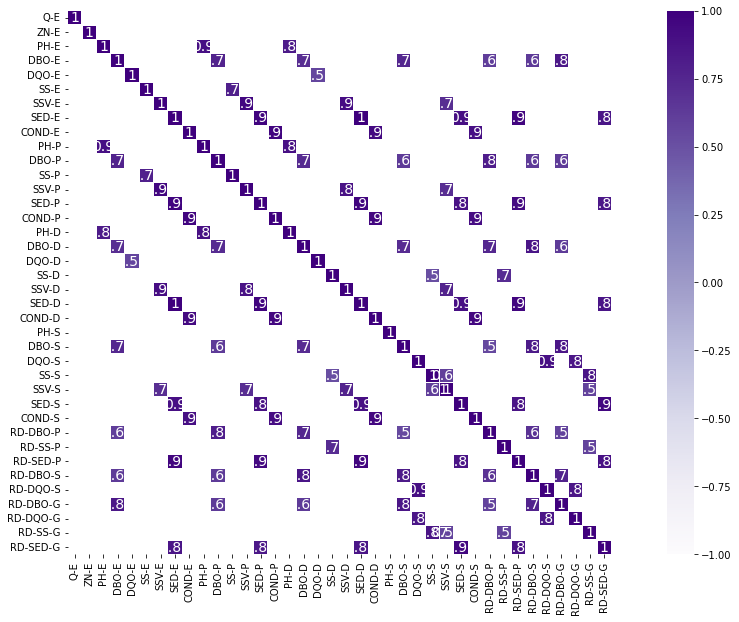

In [42]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr[(corr>=0.5) | (corr <= -0.5)],vmax=1.0, vmin=-1.0,linewidths=0.1,annot=True,
            annot_kws={"size":14},square=True, cmap='Purples')

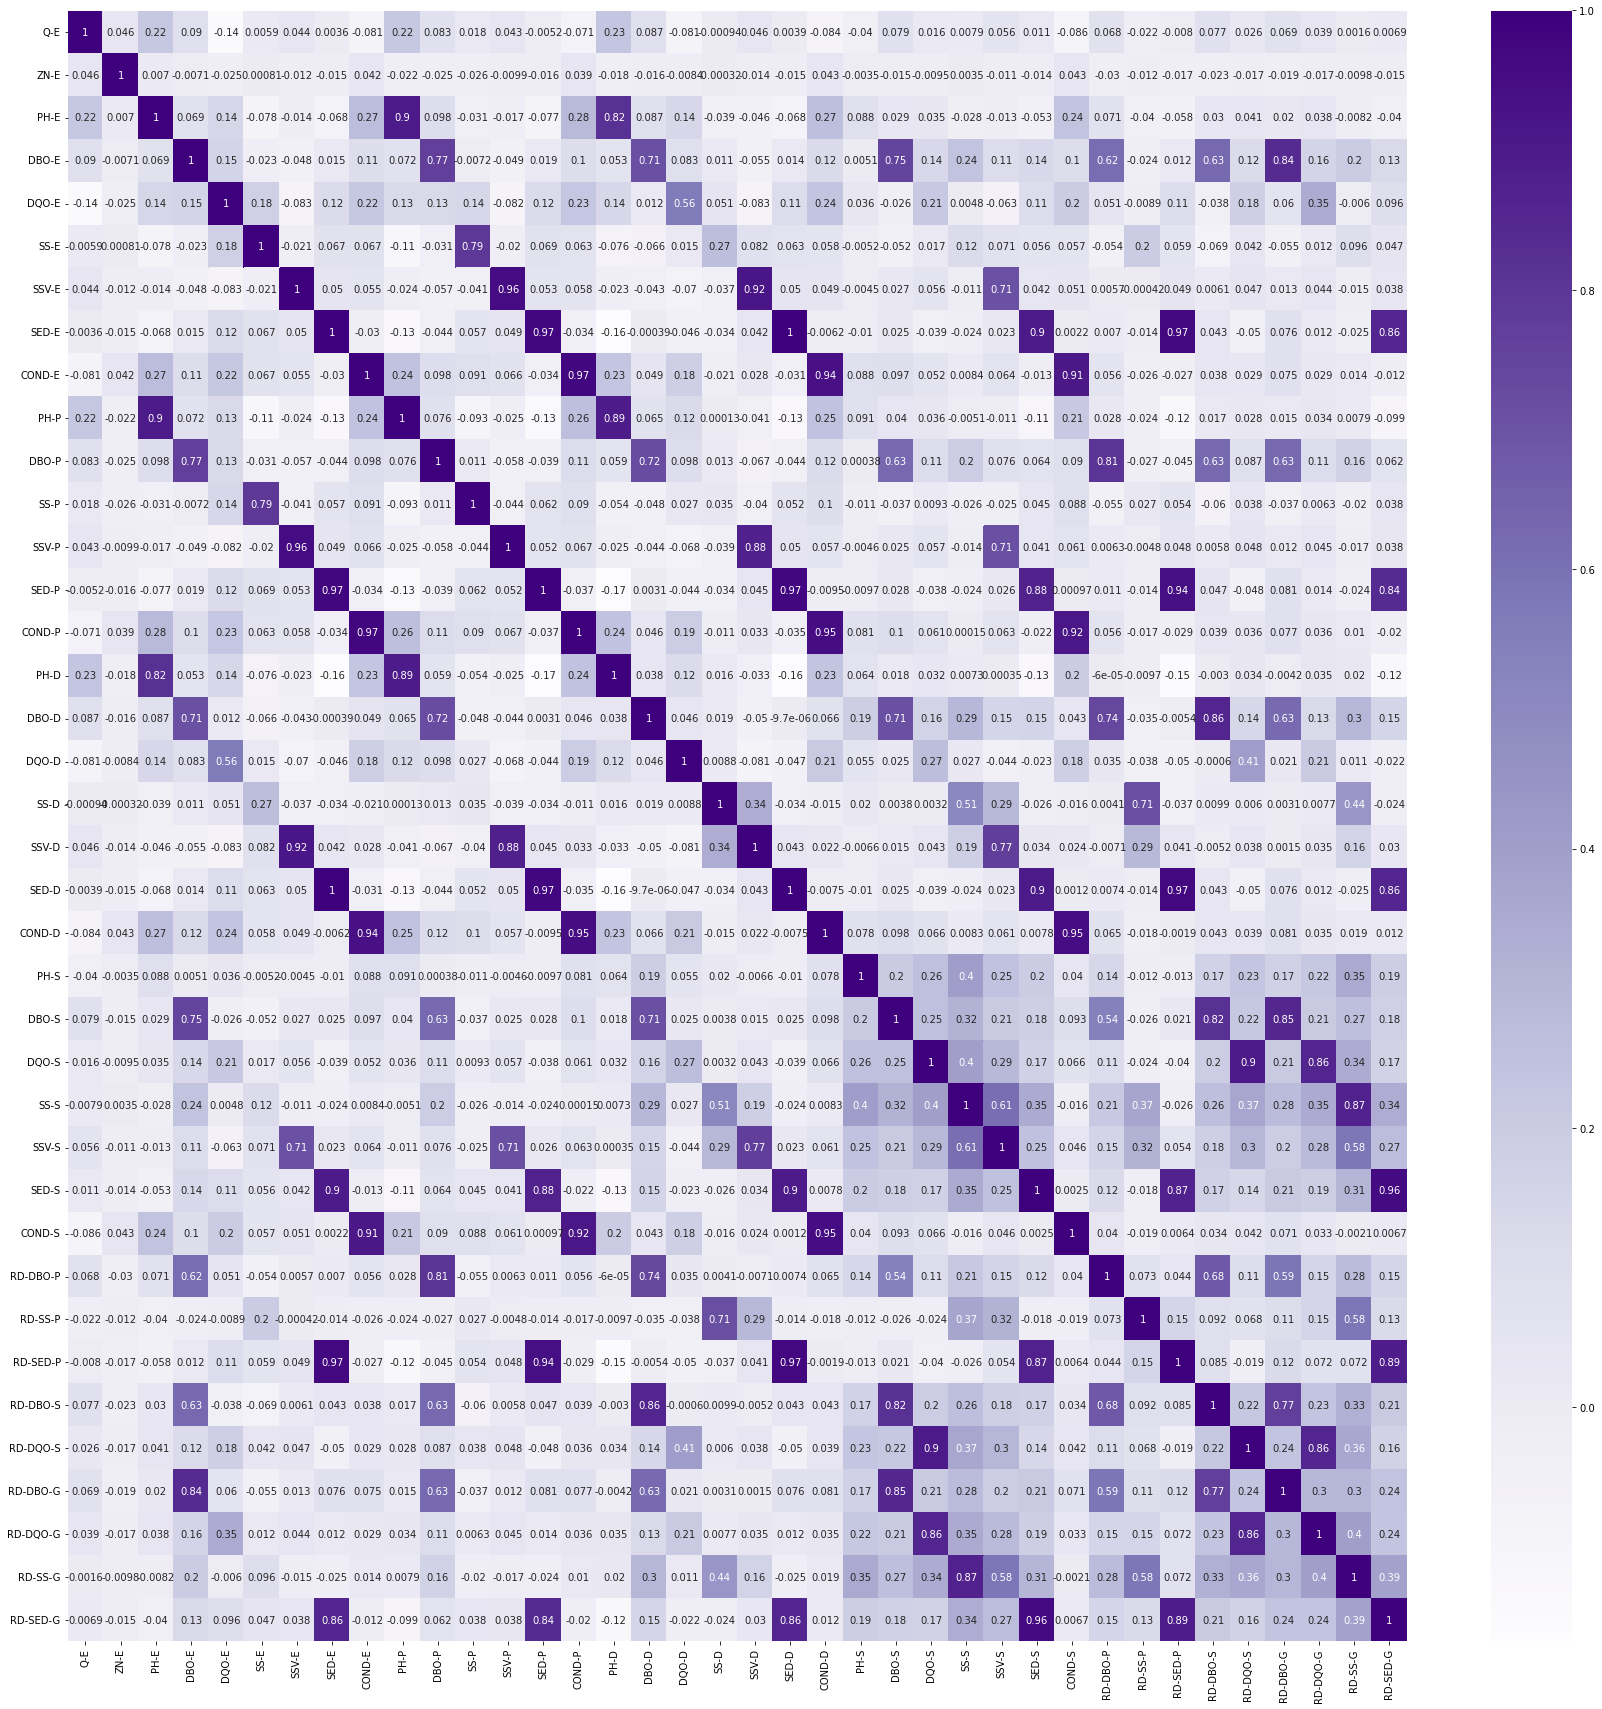

In [43]:
corr = df.corr()
top_corr_features = corr.index
plt.figure(figsize=(30,30))
g=sns.heatmap(corr,annot=True,cmap="Purples")

In [44]:
def remove_outliers(df):
    df = df[(np.abs(df-df.mean()) <= (3*df.std()))]
    return df

In [45]:
df = remove_outliers(df)
df.describe()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
count,509.000000,524.000000,525.000000,505.000000,521.000000,519.000000,516.000000,502.000000,523.000000,527.000000,...,522.000000,511.000000,523.000000,500.000000,500.000000,506.000000,498.000000,503.000000,519.000000,498.000000
mean,37226.567780,2.359065,7.810095,190.909676,406.898273,215.499037,61.393217,4.593825,1467.520076,7.829981,...,1481.019444,160.958563,58.518738,90.554200,116.722510,73.901637,106.611735,79.770998,88.963391,103.929338
std,6635.999806,2.749509,0.240294,79.234596,120.362974,76.700261,12.415264,2.743947,374.968516,0.226925,...,357.207000,391.260000,12.802547,8.944776,204.504143,76.069625,147.830626,43.844731,8.221612,76.479093
min,10050.000000,0.100000,7.200000,31.000000,81.000000,98.000000,13.200000,0.400000,651.000000,7.300000,...,683.000000,0.600000,5.300000,7.700000,8.200000,1.400000,19.600000,19.200000,10.300000,36.400000
25%,32888.000000,0.900000,7.600000,147.000000,325.000000,170.000000,55.700000,3.100000,1200.000000,7.700000,...,1234.000000,30.700000,50.550000,88.600000,81.575000,63.125000,87.600000,74.000000,87.600000,99.300000
50%,35990.000000,1.500000,7.800000,183.000000,400.000000,196.000000,64.300000,4.500000,1403.000000,7.800000,...,1430.500000,41.300000,59.500000,93.300000,85.500000,69.950000,90.300000,79.200000,90.700000,99.700000
75%,41372.000000,3.000000,8.000000,223.000000,478.000000,242.000000,69.725000,5.500000,1667.500000,8.000000,...,1687.500000,53.000000,66.900000,96.000000,88.100000,75.500000,92.600000,83.450000,93.100000,100.000000
max,60081.000000,33.500000,8.500000,1297.386552,941.000000,616.000000,85.000000,36.000000,2660.000000,8.500000,...,2610.000000,1725.689655,96.100000,100.000000,1495.700435,1049.942069,1431.548571,1040.811852,99.400000,1318.132000


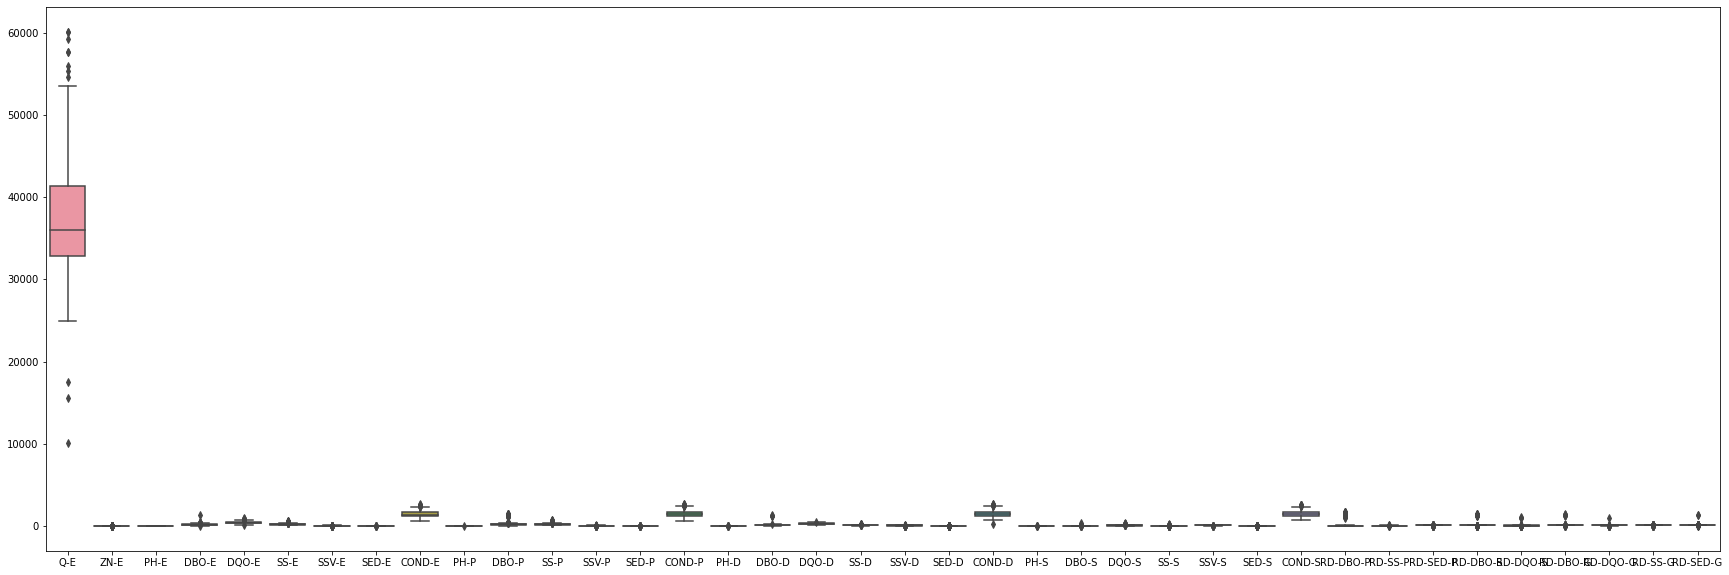

In [48]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df, dodge=False)

Korelasi Setelah Penanganan Outlier

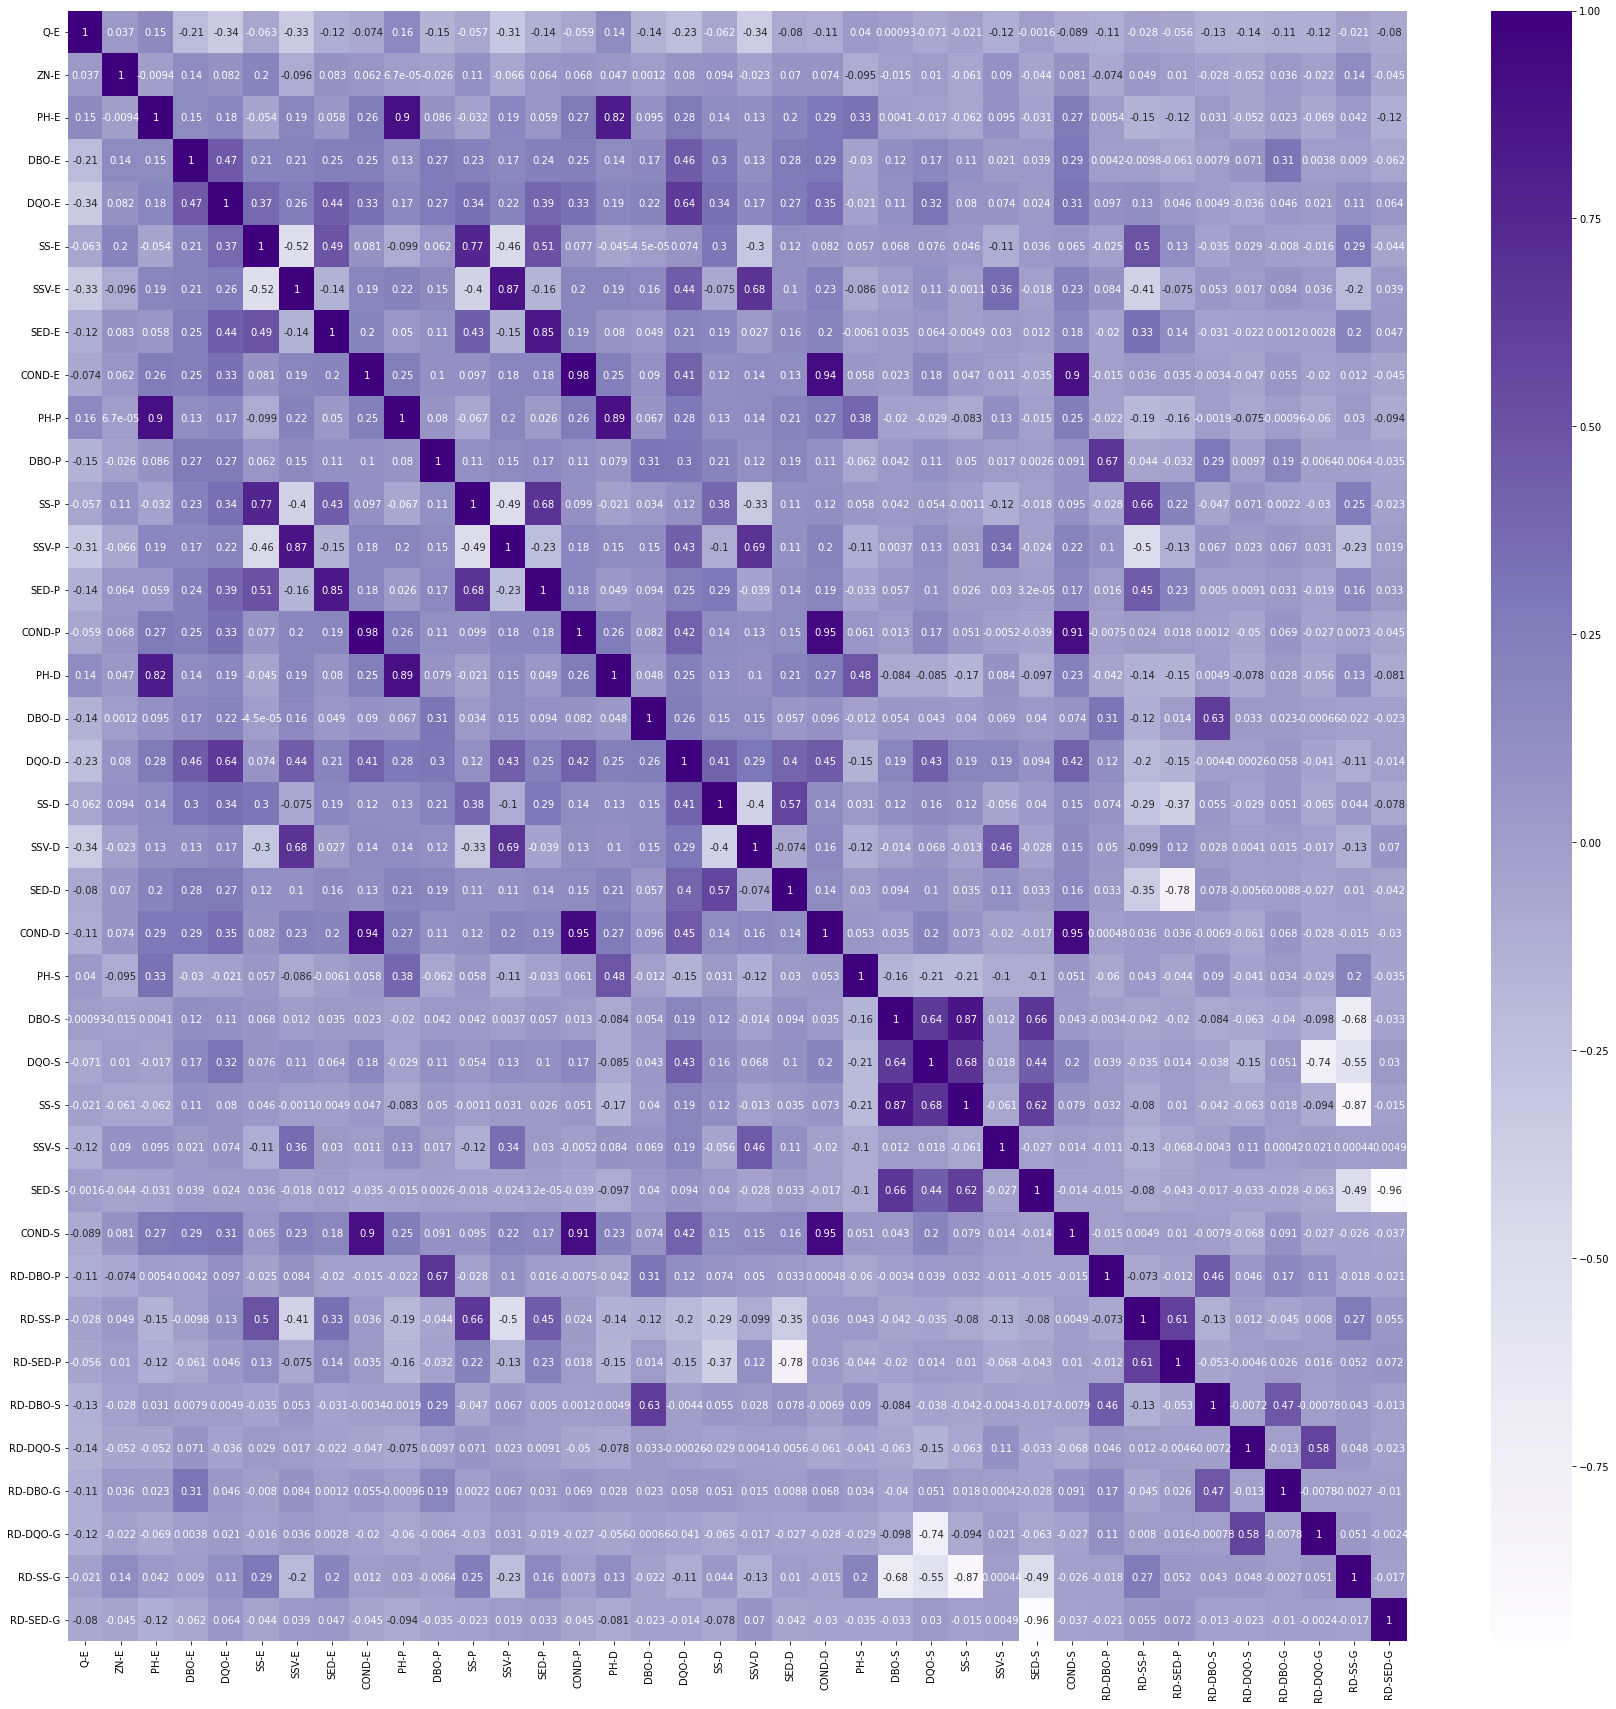

In [65]:
corr = df.corr()
top_corr_features = corr.index
plt.figure(figsize=(30,30))
g=sns.heatmap(corr,annot=True, cmap="Purples")

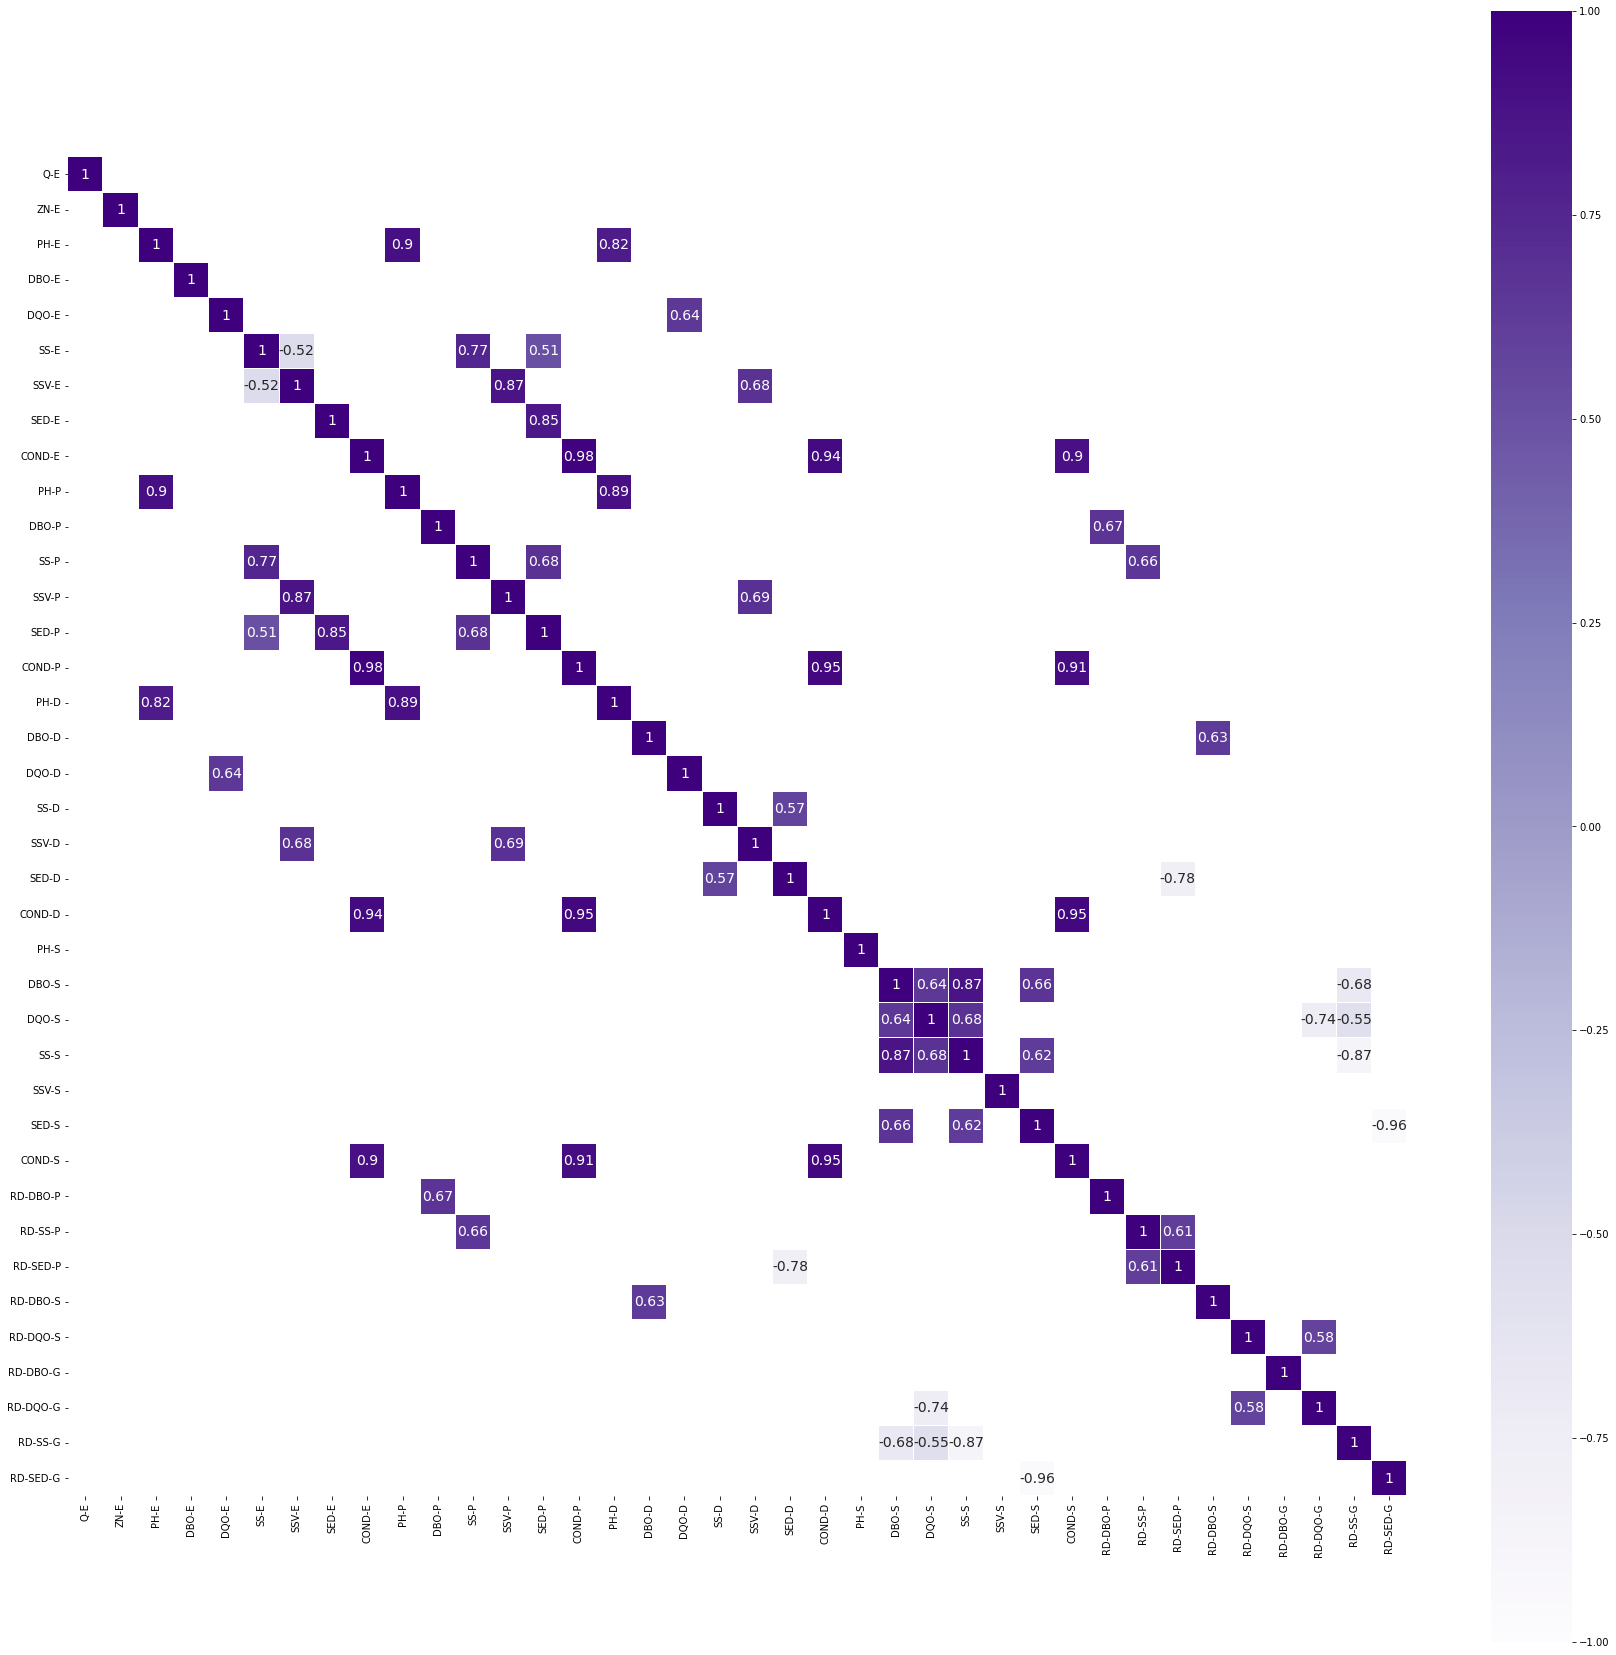

In [66]:
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr[(corr>=0.5) | (corr <= -0.5)],vmax=1.0, vmin=-1.0,linewidths=0.1,annot=True,
            annot_kws={"size":14},square=True, cmap="Purples")

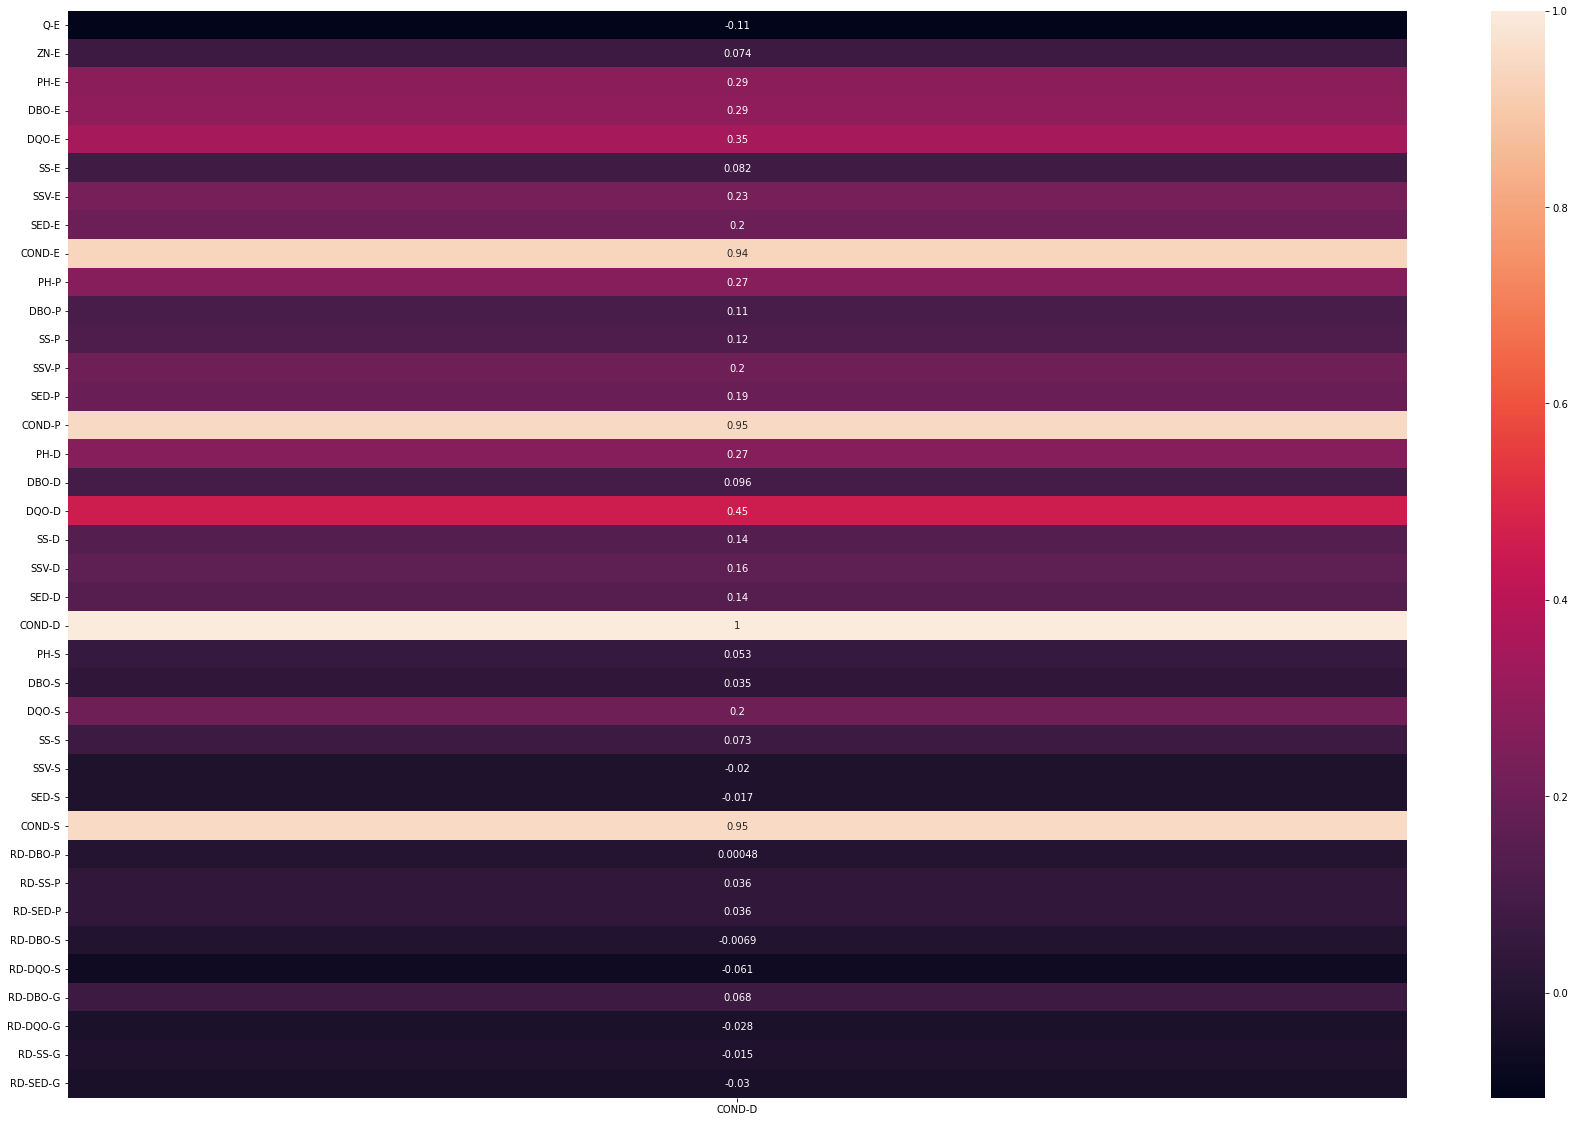

In [67]:
corr = df.corr()[['COND-D']]
plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True)

In [68]:
def select_feature(df, threshold):
    corr = set()
    cor_matrix = df.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if abs(cor_matrix.iloc[i, j]) > threshold:
                colname = cor_matrix.columns[i]
                corr.add(colname)
    return corr

In [69]:
corr_features = select_feature(df, 0.92)
corr_features, len(corr_features)

({'COND-D', 'COND-P', 'COND-S', 'RD-SED-G'}, 4)

In [70]:
df_selected = df[corr_features]

In [71]:
df = ((df_selected - df_selected.min()) / (df_selected.max() - df_selected.min())) * 9 + 1
df.describe()

,RD-SED-G,COND-P,COND-S,COND-D
count,498.000000,522.000000,522.000000,521.000000
mean,1.474174,4.700776,4.727128,5.492547
std,0.537017,1.677472,1.668325,1.392883
min,1.000000,1.000000,1.000000,1.000000
25%,1.441668,3.500000,3.573430,4.519765
50%,1.444477,4.413717,4.491178,5.295627
75%,1.446583,5.663717,5.691489,6.302355
max,10.000000,10.000000,10.000000,10.000000


In [ ]:
df.isna().sum()

In [ ]:
df_scale = df.dropna()

#**Pemodelan**

In [59]:
def create_ranCentroid(df, k):
  centroids = []
  for i in range(k):
    centroid = df.apply(lambda x : float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis =1)

In [50]:
def labelling(df, centroid):
    distance = centroid.apply(lambda x : np.sqrt(((df - x) ** 2).sum(axis = 1)))
    return distance.idxmin(axis = 1)

In [51]:
def new_centroid(df, label, k):
    return df.groupby(label).apply(lambda x : np.exp(np.log(x).mean())).T 

In [52]:
def plot(df, label, centroid, n):
    pca = PCA(n_components=2)
    df_2d = pca.fit_transform(df)
    centroid_2d = pca.fit_transform(centroid.T)
    plt.title(f'Iterasi {n}')
    plt.scatter(x = df_2d[:,0], y = df_2d[:,1], c = label)
    plt.scatter(x = centroid_2d[:,0], y = centroid_2d[:,1], marker = 'P', color = "red")
    plt.show()

In [60]:
def kmeans(df, k, nmax, centroid, old_centroid):
    n = 1
    while n < nmax and not centroid.equals(old_centroid):
        old_centroid = centroid
        label = labelling(df, centroid)
        centroid = new_centroid(df, label, k)
        plot(df, label, centroid, n)
        n += 1
    return centroid